輸入立委臉書粉專內容及選舉政見資料

In [1]:
import pandas as pd
import jieba
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

pd.set_option('display.max_colwidth', None)#setting the maximize string show

fb = pd.read_csv('nysu_10902_2019_research_right.csv')
politics = pd.read_csv('9th_legislator_promise.csv')
fb.page_name.unique() #觀察人名在資料集中叫什麼名字
politics.姓名.unique()

array(['吳思瑤', '姚文智', '何志偉', '蔣萬安', '李彥秀', '林昶佐', '蔣乃辛', '費鴻泰', '賴士葆',
       '呂 孫 綾', '林 淑 芬', '高志鵬', '余天', '吳 秉 叡', '蘇 巧 慧', '張 宏 陸', '羅 致 政',
       '江 永 昌', '林 德 福', '吳 琪 銘', '羅 明 才', '黃 國 昌', '蔡適應', '鄭 運 鵬',
       '陳賴素美', '陳學聖', '鄭寶清', '呂玉玲', '趙正宇', '林為洲', '柯建銘', '陳超明', '徐志榮',
       '蔡其昌', '顏寬恒', '洪慈庸', '張廖萬堅', '盧秀燕', '沈智慧', '黃國書', '何欣純', '江啟臣',
       '王惠美', '柯呈枋', '黃秀芳', '洪宗熠', '陳素月', '馬 文 君', '許 淑 華', '蘇 治 芬',
       '劉 建 國', '李 俊 俋', '蔡 易 餘', '陳 明 文', '葉宜津', '黃偉哲', '郭國文  ', '陳亭妃',
       '林俊憲', '王定宇', '邱 議 瑩', '邱 志 偉', '劉 世 芳', '林 岱 樺', '管 碧 玲', '李 昆 澤',
       '趙 天 麟', '馬 凱 妮', '賴 瑞 隆', '蘇震清', '鍾佳濱', '莊瑞雄', '陳歐珀', '蕭美琴',
       '劉櫂豪', '楊 曜', '楊鎮浯', '陳玉珍', '陳雪生', '廖國棟', '鄭天財', '陳瑩', '高金素梅',
       '簡東明', '孔文吉', nan], dtype=object)

以蘇巧慧為例，建立發文文字斷詞表

---



In [2]:
su = fb[fb.page_name == "蘇巧慧"]
su.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
15937,456170574528072_1635611069917344,456170574528072,蘇巧慧,政治人物,吃雞肉也要看雞走路！\n\n今天早上我到東湖里拜訪呂阿添里長，一到阿添里長自家的果園，首先迎接我的就是一大群活蹦亂跳的雞，咕咕的叫聲讓人瞬間精神一振。里長說，他養的雞全部都吃玉米飼料，絕對是品質保證，不只如此，他還用獨門的接枝技術種出一棵棵飽滿厚實的白柚跟西施柚，稍稍走近就可以聞到迷人的柚，口水差點忍不住流下來～😋\n\n#大家看的出哪些是公雞哪些是母雞嗎\n#行程跑到肚子餓,蘇巧慧──覺得肚子餓。,photo,https://www.facebook.com/456170574528072/posts/1635611069917344/,2019-01-15T09:56:11+0000,2019-01-15T17:56:11,...,蘇巧慧貼文的相片,NaN,322,0,0,0,0,0,6,1


In [3]:
su['new_date'] = pd.to_datetime(su['created_time_taipei']).dt.date
su['month_year'] = pd.to_datetime(su['new_date']).dt.to_period('M')
su.head(1)

<ipython-input-3-f5ec16c235a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  su['new_date'] = pd.to_datetime(su['created_time_taipei']).dt.date
<ipython-input-3-f5ec16c235a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  su['month_year'] = pd.to_datetime(su['new_date']).dt.to_period('M')


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
15937,456170574528072_1635611069917344,456170574528072,蘇巧慧,政治人物,吃雞肉也要看雞走路！\n\n今天早上我到東湖里拜訪呂阿添里長，一到阿添里長自家的果園，首先迎接我的就是一大群活蹦亂跳的雞，咕咕的叫聲讓人瞬間精神一振。里長說，他養的雞全部都吃玉米飼料，絕對是品質保證，不只如此，他還用獨門的接枝技術種出一棵棵飽滿厚實的白柚跟西施柚，稍稍走近就可以聞到迷人的柚，口水差點忍不住流下來～😋\n\n#大家看的出哪些是公雞哪些是母雞嗎\n#行程跑到肚子餓,蘇巧慧──覺得肚子餓。,photo,https://www.facebook.com/456170574528072/posts/1635611069917344/,2019-01-15T09:56:11+0000,2019-01-15T17:56:11,...,322,0,0,0,0,0,6,1,2019-01-15,2019-01


In [4]:
# 依照按讚數 低到高排序
su = su.sort_values(by=['like_count'])
# 用新的排序當作順序
su.reset_index(inplace=True)

結巴斷詞 jieba

1.   len(liu): 看劉櫂豪的貼文總共有幾筆
2.   list(liu['message']): 把要斷詞的內容轉成 list 格式
3.   創造一個新的dataframe叫做liu_docs，型態是pandas.core.frame.DataFrame
4.   原本liu_docs裡面的'jieba_results'欄位型態是pandas.core.series.Series，需要轉成'str'(字串)型態才能做後續處理。

In [5]:
doc_names = range(len(su)) #有幾篇文章 : 444 篇文章
doc_names

range(0, 924)

In [6]:
su = su.replace(np.nan, '', regex=True) # 將nan取代成空白字串
text_list = list(su['message']) # 把所有message轉成一個list 用for iterate

What is the difference between lcult() & cut()

In [7]:
# 先看第一個
words = jieba.lcut(text_list[0], cut_all = False) # lcut return a "list"
print(words)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/pf/j1608t111mz1b3qd0qp4r02r0000gn/T/jieba.cache
Loading model cost 0.528 seconds.
Prefix dict has been built successfully.


['🚗', '樹林', '、', '鶯', '歌', '、', '新莊', '西盛', '的', '開車族們', '看過', '來', '🚗', '\n', '\n', '簡單', '一張', '圖', '\n', '就是', '要', '你', '停車', '資訊', '一把', '罩', '🔍', '\n', '\n', '春節', '期間', '除了', '鶯', '歌', '老街', '附近', '路段', '\n', '其他', '區域', '的', '路邊', '停車', '都', ' ', '#', '暫停', '收費', ' ', '喔', '✨', '\n', '\n', '#', '巧慧報', '你', '知', '系列', '💡', '\n', '#', '小資族', '的', '春節', '小', '確幸', '💰', '\n', '#', '實用', '請', '分享', '👍', '\n', '#', '留言', '說', '說', '你', '要', '去', '哪兒', '玩', '😘']


In [8]:
words = jieba.cut(text_list[0], cut_all = False) 
print(words)
#for word in words:
 #   print(word)

<generator object Tokenizer.cut at 0x7fb346c50900>


把要存斷詞結果的dataframe準備好之後，就可以開始斷詞了。</br>

第一個迴圈</br> 剛才我們知道，劉櫂豪的篇數有999篇： 我們可以用一個for迴圈來跑每一篇文章，i是對應文章的意思，會從1(第一篇)跑到999(第999篇)；</br> 而text_list就是我們剛剛轉成list型態的劉櫂豪貼文內容；text_list[1]，就是取出list第一個元素(第一篇貼文)的意思。</br>

第二個迴圈</br> words存的是文章斷詞後的集合物件(object)，我們需要跑第二個for迴圈把集合裡面的字取出來，</br> word代表斷詞集合中的一個字，先把字轉換成str(字串)型態之後，字和字之間加上空格存在一起。

append加回斷詞欄位</br> 之後把text內容存到'jieba_results'這個欄位裡面，再和liu_docs合併。</br> 最後我們liu_docs，只會一個欄位jieba_results，存斷詞之後的結果。

In [9]:
import jieba
from tqdm import tqdm
import re
jieba.load_userdict("su_dict.txt")
punctuation = " //，：:""()\n!！？｡＂＃＄％＆＇（）＊＋－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏"""
re_punctuation = "[{}] ".format(punctuation)

# creat a df to store the jieba result
su_docs = pd.DataFrame(columns=['jieba_results']) # 建立df
su_docs['jieba_results'] = su_docs['jieba_results'].astype('str')

for i in doc_names: #從第一篇到最後一篇
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word) 
    #print(words)
    #print(i) #第幾篇文章
    #print(text) #第幾篇文章的斷詞結果
    text = re.sub(re_punctuation, "", text) # 把上面那些符號從text中刪掉
    text = re.sub(r'[0-9]','',text) # 刪掉數字
    text = re.sub(r'[a-zA-Z]','',text) #刪掉英文字
#刪除文字 更多標點符號
    text = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗🎉⏰💪]','',text)  # 注意裡面不能有空白！
    s = pd.Series({'jieba_results': text})
    su_docs = su_docs.append(s, ignore_index=True)#每次的斷詞結果都加回liu_docs


In [12]:
#su_docs.iloc[400:,]  #從讚數最多的檢查

In [13]:
su['jieba_results'] = su_docs
su_post = su[['new_date','message','jieba_results','like_count']]
su_post

,new_date,message,jieba_results,like_count
0,2019-02-02,🚗樹林、鶯歌、新莊西盛的開車族們看過來🚗\n\n簡單一張圖\n就是要你停車資訊一把罩🔍\n\n春節期間除了鶯歌老街附近路段\n其他區域的路邊停車都 #暫停收費 喔✨\n\n#巧慧報你知系列💡\n#小資族的春節小確幸💰\n#實用請分享👍\n#留言說說你要去哪兒玩😘,🚗 樹林 鶯 歌 新莊 西盛 的 開車族們 看過 來 🚗 簡單 一張 圖 就是 要 你 停車 資訊 一把 罩 🔍 春節 期間 除了 鶯 歌 老街 附近 路段 其他 區域 的 路邊 停車 都 暫停 收費 喔 ✨ 巧慧報 你 知 系列 💡 小資族 的 春節 小 確幸 💰 實用 請 分享 👍 留言 說 說 你 要 去 哪兒 玩 😘,80
1,2019-04-25,【現正直播中】我正在文博會參觀展覽！,現正 直播 中 我 正在 文博會 參觀 展覽,106
2,2019-04-24,探討新聞抄襲與假消息防治，我正在 世新大學 參與 世新大學新聞學系的《小世界公民論壇：灰色地帶下的新媒體抄襲邊界在哪裡？》\n\n歡迎大家一起來討論！,探討 新聞 抄襲 與 假消息 防治 我 正在 世新大學 參與 世新大學 新聞 學系 的 《 小 世界 公民 論壇 灰色 地帶 下 的 新 媒體 抄襲 邊界 在 哪裡 歡迎 大家 一起 來 討論,113
3,2019-10-11,國會有表現，地方有成績，支持好立委，巧慧留國會！\n\n#樹林 #鶯歌 #新莊西盛,國會 有表現 地方 有 成績 支持 好 立委 巧慧 留國會 樹林 鶯 歌 新莊 西盛,114
4,2019-06-19,正在安排暑期活動了嗎？超越達人職場體驗來了！\n\n想知道一杯好喝的「飲品」是如何做出來的嗎？而一杯茶，好壞的差別又在哪裡呢？#巧辦小編Janet 這次和 #超越小編水水豹 一起出任務，帶大家到東爵茶行體驗製作茶飲～\n\n超越基金會也規劃了職場體驗活動，歡迎正在規劃暑期活動的爸爸媽媽帶著小朋友，或是所有對茶飲有興趣的朋友，一起來體驗！\n\n👉 活動時間：2019/07/05（五）13:00～16:30\n👉 活動地點：東爵好茶（樹林區東順街107號）\n👉 活動對象：年齡不限！\n👉 活動費用：完全免費\n\n👉 馬上報名：https://forms.gle/dzakDJjw2f2PJCrv8 （報名結果將另行通知）\n👉 報名截止：2019/06/21（五）23:59\n\n--\n\n👀追蹤我的IG，看不一樣的巧慧\nhttps://pse.is/GHANT,正在 安排 暑期 活動 了 嗎 超越 達人 職場 體驗 來 了 想 知道 一杯 好喝 的 飲品 是 如何 做出 來 的 嗎 而 一杯 茶 好壞 的 差別 又 在 哪裡 呢 巧辦 小編 這次 和 超越 小編 水水豹 一起 出任 務 帶 大家 到 東爵 茶 行體 驗 製 作 茶 飲 超越 基金 會 也 規劃 了 職場 體驗 活動 歡迎 正在 規劃 暑期 活動 的 爸爸 媽媽 帶 著 小朋友 或是 所有 對 茶 飲 有 興趣 的 朋友 一起 來 體驗 👉 活動 時間 五 👉 活動 地點 東爵 好 茶 樹林區 東順街 號 👉 活動 對象 年齡 不限 👉 活動費用 完全 免費 👉 馬 上 報名 報名 結果將 另行通知 👉 報名 截止 五 👀 追 蹤 我 的 看 不 一樣 的 巧慧,117
...,...,...,...,...
919,2019-12-09,12/14（六）新北群英會\n\n來唷來唷，這個週六，我和蘇貞昌院長、鄭文燦市長、吳秉叡都將在新莊光華國小和大家見面！\n\n還邀請到台語歌手 永遠的小朋友 黃西田、施文彬 甲子慧粉絲團 潘芳烈的音樂旅程現場演唱，歡迎鄉親朋友逗陣分享，作伙來聽歌！\n\n—\n\n新北群英會\n時間｜12/14（六）18:00\n地址｜新莊光華國小（新莊區龍安路452號）,六 新北 群英 會 來 唷 來 唷 這個 週六 我 和 蘇貞昌 院長 鄭文燦市 長 吳秉叡 都 將在 新莊 光華國 小 和 大家 見面 還邀 請 到 台語 歌手 永遠 的 小朋友 黃 西田 施文彬 甲子 慧粉 絲團 潘芳烈 的 音樂 旅程 現場 演唱 歡迎 鄉親 朋友 逗陣 分享 作伙來 聽歌 新北 群英 會 時間 六 地址 新莊 光華國 小 新莊 區龍安路 號 ）,10318
920,2019-11-30,【我新莊，我驕傲！】\n\n我的父親蘇貞昌當年從屏東到台北，一開始就在新莊起家，因此我自己就是在新莊長大的孩子，新莊就像我的第二故鄉，所以當我有機會為大家服務，我一定把新莊顧好。\n\n這三年多來，我除了在國會為大家發聲，我也開設新莊西盛服務處為大家服務，和吳秉叡委員一起爭取學校建設，照顧新莊的孩子，所以今天包括 光華國小 民安國小 福營國中 丹鳳高中 的家長後援會，和西盛九里所有里長，都一起站出來支持，就是因為大家這四年來都和巧慧一起努力，都見證巧慧沒有讓新莊漏氣， #蘇巧慧會做事，的確讓新莊變得更好，讓鄉親們可以大聲說：我新莊我驕傲！\n\n感謝我們超過2000位的鄉親，和我最敬愛的陳菊(花媽)秘書長、第一名的屏東縣 潘孟安縣長、我的好同事 李俊俋委員，吳秉叡委員、陳文治議員、何淑峰議員、新北市議員 鍾宏仁、廖宜琨（Kevin）議員，今天都來為我加油，有大家的鼓勵和努力，巧慧有信心，我們一起繼續努力繼續衝，一定可以一起贏！\n\n#我新莊我驕傲\n#國會有表現 #地方有成績\n\n--\n\n明天還有蔡英文總統新北競總即將開幕，作伙來幫小英巧慧加油！\n\n2020蔡英文總統連任新北競總成立大會\n時間｜12/1（日）下午1:00\n地點｜板橋第二運動場（板橋區民權路117號）,我 新莊 我 驕傲 我 的 父親 蘇貞昌 當年 從 屏東 到 台北 一開始 就 在 新莊 起家 因此 我 自己 就是 在 新莊 長 大 的 孩子 新莊 就 像 我 的 第二 故鄉 所以 當我有 機會 為 大家 服務 我 一定 把 新莊 顧好 這 三年 多來 我 除了 在 國會 為 大家 發聲 我 也 開設 新莊 西盛 服務 處為 大家 服務 和 吳秉叡 委員 一起 爭取 學校 建設 照顧 新莊 的 孩子 所以 今天 包括 光華國 小 民安 國小 福營國 中 丹鳳 高中 的 家長 後 援會 和 西盛 九里 所有 里長 都 一起 站 出來 支持 就是 因為 大家 這 四年 來 都 和 巧慧 一起 努力 都 見 證巧慧 沒 有 讓 新莊 漏氣 蘇巧慧會 做事 的 確讓 新莊 變得 更好 讓 鄉 親們 可以 大聲 說 我 新莊 我 驕傲 感謝 我們 超過 位 的 鄉親 和 我 最敬 愛的 陳 菊 花媽 秘書長 第一名 的 屏東縣 潘孟安縣 長 我 的 好 同事 李俊 俋 委 員 吳秉叡 委員 陳 文治 議員 何淑峰 議員 新北市 議員 鍾 宏仁 廖宜琨 議員 今天 都 來 為 我 加油 有 大家 的 鼓勵 和 努力 巧慧有 信心 我們 一起 繼續 努力 繼續衝 一定 可以 一起 贏 我 新莊 我 驕傲 國會 有表現 地方 有 成績 明天 還有 蔡英文 總統 新北 競總即 將開幕 作伙來 幫小英 巧慧 加油 蔡英文 總統 連任 新北 競總成 立大會 時間 日 下午 地點 板橋 第二 運動場 板橋 區民權 路 號 ）,10377
921,2019-12-29,【大小朋友無畏風雨 ①起挺巧慧！】\n\n今天的紙風車到樹林：蕃薯森林奇遇記活動原本還擔心下雨沒有人到場，沒想到還有這麼多阿公阿嬤、爸爸媽媽帶著孩子，一起來看劇，和巧慧媽媽一起度過了一個愉快的下午。\n\n這麼多大小朋友，還有自發前來的志工，就算冒雨也要參加，就是因為這三年多來，巧慧媽媽不只為大家爭取 #29校67案教育建設補助，舉辦一場又一場精彩好玩的 #巧活動，才讓大家願意在這樣的雨天前來支持。看到大家的笑臉，聽到大家熱烈的掌聲，巧慧媽媽就知道我們沒有讓大家失望！\n\n下週1/4(六)，巧慧媽媽還邀請到好玩的劇團，到 #新莊 要來和大家一起進行 #選前之夜 #親子踩街大遊行，不只今天超受歡迎的 #閃亮巧慧棒 將再次出現，還有精彩的雜耍表演，以及神秘嘉賓到場，今天沒玩到的，我們下週六再一起來！\n\n#巧活動品質有保證\n#風雨無阻挺巧慧\n#合照歡迎自取\n\n—\n\n新莊選前之夜：親子踩街大遊行\n時間｜1/4(六)14:00\n地點｜新莊競總對面出發（新莊區民安西路212巷）,大小 朋友 無畏 風雨 ① 起挺巧慧 今天 的 紙風車 到 樹林 蕃薯 森林 奇遇 記活動 原本 還擔 心 下雨 沒 有人 到場 沒 想到 還有 這麼 多 阿公 阿嬤 爸爸 媽媽 帶 著 孩子 一起 來 看劇 和 巧慧媽媽 一起 度過 了 一個 愉快 的 下午 這麼 多 大小 朋友 還有 自發前 來 的 志工 就算 冒雨 也 要 參加 就是 因為 這 三年 多來 巧慧媽媽 不 只 為 大家 爭取 校 案 教育 建設 補助 舉辦 一場 又 一場 精彩 好玩 的 巧活動 才 讓 大家 願 意在 這樣 的 雨天 前來 支持 看到 大家 的 笑 臉 聽到 大家 熱烈 的 掌聲 巧慧媽媽 就 知道 我們 沒 有 讓 大家 失望 下週 六 巧慧媽媽 還邀 請 到 好玩 的 劇團 到 新莊 要來 和 大家 一起 進行 選前 之夜 親子 踩 街大遊行 不 只 今天 超受 歡迎 的 閃亮 巧慧棒 將 再次 出現 還有 精彩 的 雜耍 表演 以及 神秘 嘉賓 到場 今天 沒玩到 的 我們 

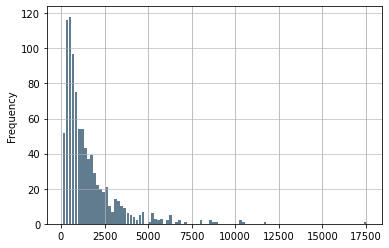

In [14]:
# 看讚數的分佈 y 軸是該讚數的貼文數 來看我們要怎麼取哪個讚數區間資料
commutes = su_post['like_count']
commutes.plot.hist(grid=True, bins=100, rwidth=0.9,
color='#607c8e')
plt.grid(axis='y', alpha=0.75)

In [15]:
temp = su_post[(su_post['like_count'] <= 18000) & (su_post['like_count'] > 2000)] #讚數大於500 小於1000才取 : 201  篇文章
temp

,new_date,message,jieba_results,like_count
714,2019-12-15,【新北群英會，新莊大團結！】\n\n非常感謝鄉親力挺，昨天超過3000鄉親湧入 #新北群英會，讓光華國小大爆滿，連椅子都不夠坐啦！\n\n把新莊顧好，我和吳秉叡委員過去共同合作，為新莊鄉親爭取各項建設，包括民安國小地下停車場納入前瞻計畫、民安國小新操場、國泰國小新操場、福營國中操場改善、丹鳳高中排水改善⋯等，甚至我們新北群英會舉辦的地點，新莊光華國小的操場，就是我們一起努力爭取而來的成績之一。\n\n我想正是因為我們在 #國會有表現 #地方有成績，加上 蔡英文 Tsai Ing-wen總統 蘇貞昌院長領導下的執政團隊，讓大家看見我們 #有政府 #會做事， 鄭文燦等市長在地方施政也讓鄉親有感，所以才有這麼多人昨晚都站出來相挺！\n\n讓會做事的人，繼續連任為鄉親服務，謝謝大家的加油打氣，我們會保持這樣的動力，繼續衝下去，明年的1/11，拜託大家一定要出來投票，台灣要贏，新莊一定會大贏！\n\n#三張選票顧台灣\n#總統票投3號 #立委票挺巧慧大秉 #政黨票選民進黨,新北 群英 會 新莊 大團結 非常 感謝 鄉 親力 挺 昨天 超過 鄉親 湧入 新北 群英 會 讓 光華國 小大 爆滿 連 椅子 都 不夠 坐 啦 把 新莊 顧好 我 和 吳秉叡 委員過 去 共同 合作 為 新莊 鄉親 爭取 各項 建設 包括 民安 國小 地下 停車場 納入 前瞻 計畫 民安 國小新 操場 國泰國 小新 操場 福營國 中 操場 改善 丹鳳 高中 排水 改善 等 甚至 我們 新北 群英 會舉 辦 的 地點 新莊 光華國 小 的 操場 就是 我們 一起 努力 爭取 而 來 的 成績 之一 我 想 正是 因為 我們 在 國會 有表現 地方 有 成績 加上 蔡英文 總統 蘇貞昌 院長 領導 下 的 執政團隊 讓 大家 看見 我們 有 政府 會 做事 鄭文燦 等 市長 在 地方 施政 也 讓 鄉親 有感 所以 才 有 這麼 多 人 昨晚 都 站 出來 相挺 讓 會 做事 的 人 繼續 連任 為 鄉親 服務 謝謝 大家 的 加油 打氣 我們 會 保持 這樣 的 動力 繼續衝 下去 明年 的 拜 託 大家 一定 要 出來 投票 台灣 要贏 新莊 一定 會大贏 三張 選票 顧 台灣 總統 票 投 號 立委 票 挺 巧慧大秉 政黨票 選民進 黨,2014
715,2019-08-09,【不用再等18年！鳳鳴車站最新進度報告】\n\n鄉親們為了鳳鳴車站，已經等了18年，自從我上任立委之後就不斷努力、多次會勘，終於有重大突破！究竟為什麼我們的鳳鳴車站等了這麼久？現在進度到哪裡？接下來又會怎麼做？我特別製作了一支影片要向大家報告，一起來看看：\n\n#蘇巧慧會做事\n#加速鳳鳴車站建置\n#臨時站5年內完工\n\n--\n\n📱粉專設為 #搶先看，最新訊息不漏接！\n\n🔍也可以加入我的line官方帳號\nhttps://line.me/R/ti/p/%40zol4121r\n\n👀再追蹤我的IG，看不一樣的巧慧\nhttps://pse.is/GHANT\n\n💁‍是鐵粉就會看巧官網！\nhttps://chiao.tw/,不用 再 等 年 鳳鳴 車站 最新 進度 報告 鄉 親們 為 了 鳳鳴 車站 已經 等 了 年 自從 我 上任 立委 之後就 不斷 努力 多次 會 勘 終於有 重大突破 究竟 為 什麼 我們 的 鳳鳴 車站 等 了 這麼 久 現在 進度 到 哪裡 接下 來 又 會 怎麼 做 我特 別 製 作 了 一支 影片 要 向 大家 報告 一起 來 看看 蘇巧慧會 做事 加速 鳳鳴 車站 建置 臨時 站 年 內 完工 📱 粉 專設 為 搶先 看 最新 訊息 不 漏接 🔍 也 可以 加入 我 的 官方 帳號 👀 再 追 蹤 我 的 看 不 一樣 的 巧慧 💁 ‍ 是 鐵粉 就 會 看巧 官網 /,2023
716,2019-08-04,【巧歡唱 #鶯歌中湖場 爆場啦！】\n\n昨天巧歡唱，真的爆場啦！還有人遠從台東上來幫朋友加油，太感心了～全場跟著中湖里志工隊一起跳了瀟灑走一回，連工作人員都跟著嗨起來，助理跳到忘我竟然還跑來跟我搶鏡頭（齁氣氣氣氣氣）！\n\n這麼好玩的巧歡唱，錯過就太可惜了，我們還有後續場次已經在籌備中，記得把我的粉絲專頁設為搶先看，持續鎖定最新消息就對了！\n\n--\n\n🎤最新巧歡唱活動消息&完整演唱照片，請加入我的Line群組\nhttps://reurl.cc/ENq4n\n\n🔍也可以加入我的line官方帳號\nhttps://reurl.cc/VbbXy\n\n👀再追蹤我的IG，看不一樣的巧慧\nhttps://pse.is/GHANT\n\n💁‍是鐵粉就會看巧官網！\nhttps://chiao.tw/,巧歡 唱 鶯 歌中 湖場 爆場 啦 昨天 巧歡 唱 真的 爆場 啦 還 有人 遠 從 台 東上 來 幫 朋友 加油 太感心 了 全場 跟 著 中 湖里 志工隊 一起 跳 了 瀟灑 走 一回 連 工作 人員 都 跟 著 嗨 起來 助理 跳 到 忘我 竟然 還跑 來 跟 我 搶 鏡頭 齁 氣氣 氣氣氣 這麼 好玩 的 巧歡 唱 錯過 就 太 可惜 了 我們 還有後續 場次 已經 在 籌備 中 記得 把 我 的 粉絲 專頁 設為 搶 先 看 持續 鎖定 最新消息 就 對 了 🎤 最新 巧歡 唱 活動 消息 完整 演唱 照片 請 加入 我 的 群組 🔍 也 可以 加入 我 的 官方 帳號 👀 再 追 蹤 我 的 看 不 一樣 的 巧慧 💁 ‍ 是 鐵粉 就 會 看巧 官網 /,2026
717,2020-01-10,【直播】 台灣要贏，巧慧①定贏\n\n選前最後衝刺，最重要的貴賓－－「蘇媽媽」來了，我們正在 #鶯歌 進行車隊掃街！\n\n在這最後關鍵幾小時，邀請所有鄉親好朋友和我們一起站出來，也請大家一定要大力幫忙分享直播，1票拉１票，我們明天一起出門投票！\n\n#1314護台灣\n#1號蘇巧慧 #1定留國會\n#3號英德勝利 #14號民進黨\n\n--\n\n🚗車隊掃街路線：\n\n鶯歌競選總部（文化路175號）出發→左轉中正一路→建德社區迴轉→中正一路→左轉平交道→右轉館前路→左轉文化路→三鶯橋下迴轉→文化路→左轉尖山路→直行中正三路→東員鋼鐵迴轉→中正三路→右轉二甲里(二橋活動中心右轉)→右轉中正二路→左轉正義平交道→尖山埔路二段→左轉鶯桃路→右轉永明街→右轉國華路→左轉建國路→左轉國慶街→左轉光明街→右轉國華路→左轉鶯桃路→右轉永和街(丁火山) →左轉鶯歌路→右轉鶯桃路→右轉鳳吉一街→右轉平交道→大湖路→聖天宮(參拜休息)→左轉大湖路530巷→左轉大湖路→直行中湖街→弘崧窯業迴轉→中湖街→左轉大湖路→左轉中山路→右轉仁愛路→右轉建國路→左轉中正一路→左轉文化路→鶯歌競選總部,直播 台灣 要贏 巧慧 ① 定贏 選前 最後衝 刺 最 重要 的 貴賓 蘇媽媽 來 了 我們 正在 鶯 歌 進行 車隊 掃街 在 這最後關鍵 幾小時 邀請 所有 鄉親 好 朋友 和 我們 一起 站 出來 也 請 大家 一定 要 大力 幫忙 分享 直播 票拉 １ 票 我們 明天 一起 出門 投票 護 台灣 號蘇巧慧 定留 國會 號 英德 勝利 號民進 黨 🚗 車隊 掃街 路線 鶯 歌 競選總部 文化路 號 出發 → 左轉 中正 一路 → 建德 社區 迴 轉 → 中正 一路 → 左轉 平交道 → 右 轉館 前路 → 左轉 文化路 → 三鶯橋 下 迴 轉 → 文化路 → 左轉 尖 山路 → 直行 中正 三路 → 東員鋼 鐵 迴 轉 → 中正 三路 → 右轉 二甲 里 二橋 活動 中心 右轉 → 右轉 中正 二路 → 左轉 正義 平交道 → 尖山 埔 路 二段 → 左轉 鶯 桃路 → 右轉 永明 街 → 右 轉國華路 → 左轉 建國路 → 左轉 國慶街 → 左轉 光明 街 → 右 轉國華路 → 左轉 鶯 桃路 → 右轉 永和 街 丁 火山 → 左轉 鶯 歌路 → 右 轉鶯桃路 → 右 轉鳳吉一街 → 右轉 平交道 → 大湖 路 → 聖天宮 參拜 休息 → 左轉 大湖 路 巷 → 左轉 大湖 路 → 直行 中湖 街 → 弘崧 窯業 迴 轉 → 中湖 街 → 左轉 大湖 路 → 左轉 中山路 → 右 轉仁愛路 → 右轉 建國路 → 左轉 中正 一路 → 左轉 文化路 → 鶯 歌 競選總部,2028
718,2020-01-08,【直播】新莊車隊掃街\n\n倒數3天，3張選票顧台灣，1314護台灣，我和 陳文治議員正在 #新莊進行車隊掃街，請大家逗分享、逗催票！\n\n別忘了還有今晚的 #鶯歌選前之夜，晚上六點半，我在鶯歌正義新村籃球場等你。\n\n#1號蘇巧慧 #1定留國會\n\n—\n\n車隊掃街路線：\n\n新莊競選總部（新莊民安西路205號）對面出發→右轉民安西路480巷→左轉新樹路320巷→左轉瓊林南路→左轉新樹路333巷→右轉新樹路333巷接315巷→右轉新樹路→左轉民安路→左轉民安路206巷→右轉民安東路→左轉新樹路244巷→右轉新樹路→右轉新樹路258巷→左轉新樹路268巷39弄→左轉新樹路268巷→右轉新樹路268巷→右轉西盛街245巷27弄→左轉西盛街201巷→右轉民本街→左轉西盛街→右轉西盛街→右轉西盛街153巷→左轉民本街→左轉民本街33巷→右轉西盛街→右轉民本街29巷→左轉民本街→左轉民本街27巷→右轉西盛街→右轉民本街25巷→左轉民本街→左轉民本街11巷→

TF-IDF
我們把剛才斷好詞的貼文，轉成list形式，全部放到corpus變數裡面，方便做tf-idf處理。

CountVectorizer算字頻（搭配fit_transform）
TfidfTransformer計算TFIDF

In [16]:
corpus = temp['jieba_results'].values.tolist() #如果不做這個、結果會不同 太generall

In [17]:
# TF-IDF
# coding:utf-8  

#算字頻
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  # 計算單字出現在文件中的次數
X = vectorizer.fit_transform(corpus) #  input must be a list, return a matrix (#of corpus) x (# of word) # 201 x 4835
word = vectorizer.get_feature_names() # column name which is the word
message_column = word

#計算TFIDF
from sklearn.feature_extraction.text import TfidfTransformer  # 計算tfidf
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X) # X : corpus x word matrix, output:201 x 4835

In [18]:
tfidf_view = pd.DataFrame(tfidf.toarray(), columns = vectorizer.get_feature_names())
tfidf_view

,一一,一上,一下,一仗,一代人,一份,一位,一個,一入,一再,...,鼓勵,齊下,齊家治國,龍埔國,龍安路,龍捷,龍議員,龍點睛,龐大電費,龜裂
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.020696,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.072093,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053259,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.075901,0.0,0.0,0.0


In [19]:
# #使用LDA演算法
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=10, random_state=None)
LDA.fit(X) # 用countrvectorizer() result 去fit 

topic_message = list()
#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    mes_topic = [vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]]
    print(mes_topic)
    for i in mes_topic:
        topic_message.append(i)

TOP 10 WORDS PER TOPIC #0
['工程', '蘇貞昌', '鄉親', '計畫', '一起', '新北市', '蘇巧慧', '台灣', '地方', '我們']
TOP 10 WORDS PER TOPIC #1
['一起', '做事', '新莊', '時間', '大家', '服務', '巧慧', '廁所', '樹林', '可以']
TOP 10 WORDS PER TOPIC #2
['樹林', '我們', '新樹路', '轉民本', '直行', '西盛街', '右轉', '左轉', '西路', '民安']
TOP 10 WORDS PER TOPIC #3
['糧倉', '家長', '文化', '孩子', '潘文忠', '新莊', '教育部', '一起', '教育', '課綱']
TOP 10 WORDS PER TOPIC #4
['專設', '鐵粉', '看巧', '官網', '加入', '一樣', '大家', '操場', '可以', '巧慧']
TOP 10 WORDS PER TOPIC #5
['巧學校', '樹林', '巧慧', '市場', '朋友', '今天', '台灣', '一起', '大家', '我們']
TOP 10 WORDS PER TOPIC #6
['努力', '繼續', '今天', '蔡英文', '總統', '鄉親', '一起', '台灣', '大家', '我們']
TOP 10 WORDS PER TOPIC #7
['今天', '要贏', '立委', '我們', '一起', '做事', '院長', '大家', '台灣', '總統']
TOP 10 WORDS PER TOPIC #8
['直播', '鄉親', '巧慧', '大家', '樹林', '我們', '一起', '新莊', '右轉', '左轉']
TOP 10 WORDS PER TOPIC #9
['樹林', '希望', '一定', '工藝', '巧慧', '大家', '香港', '我們', '一起', '台灣']


In [20]:

LDA.fit(tfidf) # 用tfidf result 去fit 

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['蔡英文', '巧慧', '台灣', '新莊', '一起', '新北', '號蘇巧慧', '時間', '總統', '樹林']
TOP 10 WORDS PER TOPIC #1
['爭取', '新莊', '補助', '一起', '孩子', '我們', '直播', '平安', '大家', '操場']
TOP 10 WORDS PER TOPIC #2
['加油', '一定', '院長', '法官', '一起', '今天', '直播', '香港', '我們', '台灣']
TOP 10 WORDS PER TOPIC #3
['做事', '課綱', '廁所', '孩子', '文林', '操場', '台灣', '我們', '教育', '國小']
TOP 10 WORDS PER TOPIC #4
['我們', '大家', '直播', '樹林', '新莊', '西路', '民安', '直行', '右轉', '左轉']
TOP 10 WORDS PER TOPIC #5
['工藝', '朝方', '文化', '努力', '直播', '一起', '我們', '台灣', '樹林', '大家']
TOP 10 WORDS PER TOPIC #6
['專設', '訊息', '漏接', '衝衝衝', '帳號', '看巧', '官網', '鐵粉', '官方', '政府']
TOP 10 WORDS PER TOPIC #7
['爸爸', '巧慧', '台灣', '立委', '主席', '我們', '加油', '直播', '加入', '大家']
TOP 10 WORDS PER TOPIC #8
['賴清德', '國會', '定留', '選前', '勝利', '號蘇巧慧', '一起', '我們', '台灣', '總統']
TOP 10 WORDS PER TOPIC #9
['一起', '鄉親', '大家', '加油', '巧慧', '總統', '花媽', '操場', '議員', '新莊']


In [33]:
#政見做斷詞

politics_su = politics[politics.姓名 == "蘇 巧 慧"].政見.to_string()
politics_su = re.sub(re_punctuation, "", politics_su)
politics_su = re.sub(r'[0-9]','',politics_su)
politics_su = re.sub(r'[a-zA-Z]','',politics_su)
politics_su = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗、，」「（）]','',politics_su)  # 注意裡面不能有空白！
jieba.load_userdict("su_dict.txt")
politics_words = jieba.lcut(politics_su, cut_all = False)


In [34]:
#觀察政見的斷詞結果
inspect_words = jieba.cut(politics_su, cut_all = False)
text = ''
for word in inspect_words:
    text = text + ' ' + str(word) 
text = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗]','',text)
text = re.sub(re_punctuation, "", text)

In [35]:

p_vectorizer = CountVectorizer()  
p_X = p_vectorizer.fit_transform(politics_words)    
p_colword = p_vectorizer.get_feature_names() 
p_transformer = TfidfTransformer()  
p_tfidf = p_transformer.fit_transform(p_X) 

p_LDA = LatentDirichletAllocation(n_components=8, random_state=None)


p_LDA.fit(p_tfidf)
topic_politics = list()

for i,topic in enumerate(p_LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    topic_p = [vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]]
    print(topic_p)
    for i in topic_p:
        topic_politics.append(i)


TOP 10 WORDS PER TOPIC #0
['一早', '三月', '一萬人', '一員', '三民', '一律', '一翻', '一波', '一條心', '一次']
TOP 10 WORDS PER TOPIC #1
['一百年', '三天', '上學校', '一月', '一回', '三湖', '一絲動搖', '一點', '一生一世', '一街']
TOP 10 WORDS PER TOPIC #2
['一項', '三段', '三俊街', '一百分', '一開始', '一生', '一致', '三峽長', '一支', '一群']
TOP 10 WORDS PER TOPIC #3
['一桌', '一向', '一條', '三十', '一入', '一日', '一路', '三德街', '一家', '一夏']
TOP 10 WORDS PER TOPIC #4
['一國', '一位', '一代人', '三讀', '三聲', '三五', '一般', '一臂之力', '一手', '一座']
TOP 10 WORDS PER TOPIC #5
['一絲', '三千', '一錘', '一步步', '一夕', '一堂', '一份', '一夜', '一下', '三峽']
TOP 10 WORDS PER TOPIC #6
['三百', '一刻', '一切', '一肩雙', '七星', '上個', '一水', '一一', '一樣樣', '一整天']
TOP 10 WORDS PER TOPIC #7
['三個', '上周三', '一再', '三鶯橋', '三多國', '三重', '上午', '一市', '一大步', '一間']


In [36]:
# #政見所有topic 總表
for i in topic_politics:
#for i in topic_:# 文章內容的topic所有字的總表
    print(i,end = ', ') 

一早, 三月, 一萬人, 一員, 三民, 一律, 一翻, 一波, 一條心, 一次, 一百年, 三天, 上學校, 一月, 一回, 三湖, 一絲動搖, 一點, 一生一世, 一街, 一項, 三段, 三俊街, 一百分, 一開始, 一生, 一致, 三峽長, 一支, 一群, 一桌, 一向, 一條, 三十, 一入, 一日, 一路, 三德街, 一家, 一夏, 一國, 一位, 一代人, 三讀, 三聲, 三五, 一般, 一臂之力, 一手, 一座, 一絲, 三千, 一錘, 一步步, 一夕, 一堂, 一份, 一夜, 一下, 三峽, 三百, 一刻, 一切, 一肩雙, 七星, 上個, 一水, 一一, 一樣樣, 一整天, 三個, 上周三, 一再, 三鶯橋, 三多國, 三重, 上午, 一市, 一大步, 一間, 

In [37]:
#在LDA結果中每個Topic政見的詞 、 臉書貼文的詞的交集 
#set(topic_politics).intersection(topic_message) 
Counter(topic_politics+topic_message) #綜合臉書發文、政見 Topic 的詞 看出現次數
#產業升級、園區、高科技園區、加工區 、楠梓、交通、三鐵同構

Counter({'一早': 1,
         '三月': 1,
         '一萬人': 1,
         '一員': 1,
         '三民': 1,
         '一律': 1,
         '一翻': 1,
         '一波': 1,
         '一條心': 1,
         '一次': 1,
         '一百年': 1,
         '三天': 1,
         '上學校': 1,
         '一月': 1,
         '一回': 1,
         '三湖': 1,
         '一絲動搖': 1,
         '一點': 1,
         '一生一世': 1,
         '一街': 1,
         '一項': 1,
         '三段': 1,
         '三俊街': 1,
         '一百分': 1,
         '一開始': 1,
         '一生': 1,
         '一致': 1,
         '三峽長': 1,
         '一支': 1,
         '一群': 1,
         '一桌': 1,
         '一向': 1,
         '一條': 1,
         '三十': 1,
         '一入': 1,
         '一日': 1,
         '一路': 1,
         '三德街': 1,
         '一家': 1,
         '一夏': 1,
         '一國': 1,
         '一位': 1,
         '一代人': 1,
         '三讀': 1,
         '三聲': 1,
         '三五': 1,
         '一般': 1,
         '一臂之力': 1,
         '一手': 1,
         '一座': 1,
         '一絲': 1,
         '三千': 1,
         '一錘': 1,
         '一步步': 1,
         '一

我們可以用 臉書貼文和政見 Topic word 的交集 會推測
劉世芳的幾個重點
1. 經濟相關的科技 園區和加工區
    - 高科技、發展、產業、加工區、園區、產業、就業、計畫、建設、
2. 楠梓地區
    -楠梓
3. 交通
    -三鐵同構、中油、交通、
4. 環境
    -環境、綠能、

高科技 相關tf idf 高 (以下討論臉書貼文)

In [39]:
top_10_message = tfidf_view.sort_values(by = ['新莊'], ascending = False).index[:10] # 把高科技tfidf 高的文章做排序取top 10的文章 拿出文章的index
tfidf_view.sort_values(by = ['新莊'], ascending = False).head(10)

,一一,一上,一下,一仗,一代人,一份,一位,一個,一入,一再,...,鼓勵,齊下,齊家治國,龍埔國,龍安路,龍捷,龍議員,龍點睛,龐大電費,龜裂
206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.072093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[206,]).sort_values(by = 206, ascending=False)
#pd.DataFrame(tfidf_view.iloc[193,]).sort_values(by = 193, ascending=False)
# bad attemption 


TypeError: '<' not supported between instances of 'numpy.ndarray' and 'str'

In [50]:
#這些都是讚數很高的文章 每篇文章最高的tfidf 詞
message_newtfidf = tfidf_view
message_newtfidf['term'] = message_newtfidf[message_column].idxmax(axis = 1)
message_newtfidf['term'].tail(20) # 在這邊的話看讚數最多的文章他們tfidf 最高的詞是什麼

190      豬肉
191      上午
192      艱難
193      新莊
194      四年
195      香港
196      總統
197     蘇院長
198      北大
199      報告
200      特刊
201      台東
202      院會
203      英雄
204      座位
205      群英
206      新莊
207    巧慧媽媽
208      賴前
209      一席
Name: term, dtype: object

In [43]:
#假如以剛剛科學園區相關主題為例 想看tfidf 最高的詞是科學園區的文章
message_newtfidf[message_newtfidf['term']=="新莊"]

,一一,一上,一下,一仗,一代人,一份,一位,一個,一入,一再,...,齊下,齊家治國,龍埔國,龍安路,龍捷,龍議員,龍點睛,龐大電費,龜裂,term
78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,新莊
193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,新莊
206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,新莊


In [46]:
# 會發現文章出現tfidf是產業的很少，很正常 因為出現太多反而tfidf不會高！
temp.iloc[78,]

new_date                                                                                                                                                                                                                                                                                                                                                                                                                                                                      2019-12-30
message                                                                                        【解決積水問題，成功爭取丹鳳高中排水設施改善！】\n\n全校師生高達3000多人的丹鳳高中，是我們 #南新莊 唯一一所完全中學，因為校內原排水工程設計不良，且排水系統十分老舊，導致校內多處常因下雨造成積淹水，造成病媒蚊孳生；過去新莊也曾發生登革熱疫情，更讓家長、鄉親都非常關心積水問題。\n\n為了減少傳染病威脅，給師生更完善的校園環境，今年9月我和吳秉叡委員，一起到校會勘，成功爭取到排水設施改善經費，也在10月正式核定，等新北市政府教育局撥款後，就可以發包施工，希望在下個學期前完工！\n\n#蘇巧慧會做事\n#國會有表現 #地方有成績\n#成功爭取29校67案教育建設補助\n\n--\n\n這個周六巧慧也將在新莊舉辦親子活動，邀你一起來參加！\n\n🎉新莊踩街嘉年華\n時間｜1/4(六)14:00\n地點｜新莊競總對面(新莊區民安西路212巷)
jieba_results     解決 積水 問題 成功 爭取 丹鳳 高中 排水 設施 改善 全校 師生 

來看楠梓 ： 在臉書發文的topic中topic2,4,7 出現很多次楠梓 

In [53]:
message_newtfidf[message_newtfidf['term']=="新北"]

,一一,一上,一下,一仗,一代人,一份,一位,一個,一入,一再,...,齊下,齊家治國,龍埔國,龍安路,龍捷,龍議員,龍點睛,龐大電費,龜裂,term
153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,新北


In [54]:
temp.iloc[[153],2]

867     辣台 派 站 出來 新北 鄉親 挺起 來   日 下午  點 蔡英文     賴清德 新北 競選總部 就要 開幕 了 邀請 大家 作伙站 出來 讓 總統 連任 新北 立委 全壘 打   台灣 要贏  新北 一定 贏
Name: jieba_results, dtype: object

In [55]:
# LDA : 看每篇文章被分配在哪些主題  (tfidf)
#review topic 結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['蔡英文', '巧慧', '台灣', '新莊', '一起', '新北', '號蘇巧慧', '時間', '總統', '樹林']
TOP 10 WORDS PER TOPIC #1
['爭取', '新莊', '補助', '一起', '孩子', '我們', '直播', '平安', '大家', '操場']
TOP 10 WORDS PER TOPIC #2
['加油', '一定', '院長', '法官', '一起', '今天', '直播', '香港', '我們', '台灣']
TOP 10 WORDS PER TOPIC #3
['做事', '課綱', '廁所', '孩子', '文林', '操場', '台灣', '我們', '教育', '國小']
TOP 10 WORDS PER TOPIC #4
['我們', '大家', '直播', '樹林', '新莊', '西路', '民安', '直行', '右轉', '左轉']
TOP 10 WORDS PER TOPIC #5
['工藝', '朝方', '文化', '努力', '直播', '一起', '我們', '台灣', '樹林', '大家']
TOP 10 WORDS PER TOPIC #6
['專設', '訊息', '漏接', '衝衝衝', '帳號', '看巧', '官網', '鐵粉', '官方', '政府']
TOP 10 WORDS PER TOPIC #7
['爸爸', '巧慧', '台灣', '立委', '主席', '我們', '加油', '直播', '加入', '大家']
TOP 10 WORDS PER TOPIC #8
['賴清德', '國會', '定留', '選前', '勝利', '號蘇巧慧', '一起', '我們', '台灣', '總統']
TOP 10 WORDS PER TOPIC #9
['一起', '鄉親', '大家', '加油', '巧慧', '總統', '花媽', '操場', '議員', '新莊']


In [56]:
#可以猜猜看第一篇文是哪個topic 
temp.iloc[:,[0,2]]

,new_date,jieba_results
714,2019-12-15,新北 群英 會 新莊 大團結 非常 感謝 鄉 親力 挺 昨天 超過 鄉親 湧入 新北 群英 會 讓 光華國 小大 爆滿 連 椅子 都 不夠 坐 啦 把 新莊 顧好 我 和 吳秉叡 委員過 去 共同 合作 為 新莊 鄉親 爭取 各項 建設 包括 民安 國小 地下 停車場 納入 前瞻 計畫 民安 國小新 操場 國泰國 小新 操場 福營國 中 操場 改善 丹鳳 高中 排水 改善 等 甚至 我們 新北 群英 會舉 辦 的 地點 新莊 光華國 小 的 操場 就是 我們 一起 努力 爭取 而 來 的 成績 之一 我 想 正是 因為 我們 在 國會 有表現 地方 有 成績 加上 蔡英文 總統 蘇貞昌 院長 領導 下 的 執政團隊 讓 大家 看見 我們 有 政府 會 做事 鄭文燦 等 市長 在 地方 施政 也 讓 鄉親 有感 所以 才 有 這麼 多 人 昨晚 都 站 出來 相挺 讓 會 做事 的 人 繼續 連任 為 鄉親 服務 謝謝 大家 的 加油 打氣 我們 會 保持 這樣 的 動力 繼續衝 下去 明年 的 拜 託 大家 一定 要 出來 投票 台灣 要贏 新莊 一定 會大贏 三張 選票 顧 台灣 總統 票 投 號 立委 票 挺 巧慧大秉 政黨票 選民進 黨
715,2019-08-09,不用 再 等 年 鳳鳴 車站 最新 進度 報告 鄉 親們 為 了 鳳鳴 車站 已經 等 了 年 自從 我 上任 立委 之後就 不斷 努力 多次 會 勘 終於有 重大突破 究竟 為 什麼 我們 的 鳳鳴 車站 等 了 這麼 久 現在 進度 到 哪裡 接下 來 又 會 怎麼 做 我特 別 製 作 了 一支 影片 要 向 大家 報告 一起 來 看看 蘇巧慧會 做事 加速 鳳鳴 車站 建置 臨時 站 年 內 完工 📱 粉 專設 為 搶先 看 最新 訊息 不 漏接 🔍 也 可以 加入 我 的 官方 帳號 👀 再 追 蹤 我 的 看 不 一樣 的 巧慧 💁 ‍ 是 鐵粉 就 會 看巧 官網 /
716,2019-08-04,巧歡 唱 鶯 歌中 湖場 爆場 啦 昨天 巧歡 唱 真的 爆場 啦 還 有人 遠 從 台 東上 來 幫 朋友 加油 太感心 了 全場 跟 著 中 湖里 志工隊 一起 跳 了 瀟灑 走 一回 連 工作 人員 都 跟 著 嗨 起來 助理 跳 到 忘我 竟然 還跑 來 跟 我 搶 鏡頭 齁 氣氣 氣氣氣 這麼 好玩 的 巧歡 唱 錯過 就 太 可惜 了 我們 還有後續 場次 已經 在 籌備 中 記得 把 我 的 粉絲 專頁 設為 搶 先 看 持續 鎖定 最新消息 就 對 了 🎤 最新 巧歡 唱 活動 消息 完整 演唱 照片 請 加入 我 的 群組 🔍 也 可以 加入 我 的 官方 帳號 👀 再 追 蹤 我 的 看 不 一樣 的 巧慧 💁 ‍ 是 鐵粉 就 會 看巧 官網 /
717,2020-01-10,直播 台灣 要贏 巧慧 ① 定贏 選前 最後衝 刺 最 重要 的 貴賓 蘇媽媽 來 了 我們 正在 鶯 歌 進行 車隊 掃街 在 這最後關鍵 幾小時 邀請 所有 鄉親 好 朋友 和 我們 一起 站 出來 也 請 大家 一定 要 大力 幫忙 分享 直播 票拉 １ 票 我們 明天 一起 出門 投票 護 台灣 號蘇巧慧 定留 國會 號 英德 勝利 號民進 黨 🚗 車隊 掃街 路線 鶯 歌 競選總部 文化路 號 出發 → 左轉 中正 一路 → 建德 社區 迴 轉 → 中正 一路 → 左轉 平交道 → 右 轉館 前路 → 左轉 文化路 → 三鶯橋 下 迴 轉 → 文化路 → 左轉 尖 山路 → 直行 中正 三路 → 東員鋼 鐵 迴 轉 → 中正 三路 → 右轉 二甲 里 二橋 活動 中心 右轉 → 右轉 中正 二路 → 左轉 正義 平交道 → 尖山 埔 路 二段 → 左轉 鶯 桃路 → 右轉 永明 街 → 右 轉國華路 → 左轉 建國路 → 左轉 國慶街 → 左轉 光明 街 → 右 轉國華路 → 左轉 鶯 桃路 → 右轉 永和 街 丁 火山 → 左轉 鶯 歌路 → 右 轉鶯桃路 → 右 轉鳳吉一街 → 右轉 平交道 → 大湖 路 → 聖天宮 參拜 休息 → 左轉 大湖 路 巷 → 左轉 大湖 路 → 直行 中湖 街 → 弘崧 窯業 迴 轉 → 中湖 街 → 左轉 大湖 路 → 左轉 中山路 → 右 轉仁愛路 → 右轉 建國路 → 左轉 中正 一路 → 左轉 文化路 → 鶯 歌 競選總部
718,2020-01-08,直播 新莊 車隊 掃街 倒數 天 張選票 顧 台灣 護 台灣 我 和 陳 文治 議員 正在 新莊 進行 車隊 掃街 請 大家 逗 分享 逗 催票 別 忘 了 還有 今晚 的 鶯 歌選前 之夜 晚上 六點 半 我 在 鶯 歌正義 新村 籃球場 等 你 號蘇巧慧 定留 國會 車隊 掃街 路線 新莊 競選總部 新莊 民安 西路 號 對面 出發 → 右轉 民安 西路 巷 → 左轉 新樹路 巷 → 左 轉瓊林 南路 → 左轉 新樹路 巷 → 右轉 新樹路 巷接 巷 → 右轉 新樹路 → 左轉 民安 路 → 左轉 民安 路 巷 → 右轉 民安 東路 → 左轉 新樹路 巷 → 右轉 新樹路 → 右轉 新樹路 巷 → 左轉 新樹路 巷 弄 → 左轉 新樹路 巷 → 右轉 新樹路 巷 → 右轉 西盛街 巷 弄 → 左轉 西盛街 巷 → 右 轉民本 街 → 左轉 西盛街 → 右轉 西盛街 → 右轉 西盛街 巷 → 左 轉民本 街 → 左 轉民本 街 巷 → 右轉 西盛街 → 右 轉民本 街 巷 → 左 轉民本 街 → 左 轉民本 街 巷 → 右轉 西盛街 → 右 轉民本 街 巷 → 左 轉民本 街 → 左 轉民本 街 巷 → 右 轉民本 街 → 右轉 民安 西路 → 左轉 民安 西路 → 左轉 民安 西路 巷 → 直行 民安 西路 巷 → 左轉 民安 西路 巷 → 左轉 民安 西路 巷 → 右轉 民安 西路 → 右轉 民安 西路 → 直行 民安 西路 → 左轉 龍安路 → 右轉 西盛街 → 左轉 西盛街 巷 → 右轉 再 右 轉接 西盛街 巷 → 直行 西盛街 巷 → 直行 民安 西路 巷 → 直行 民安 西路 巷 → 左轉 再 左轉 民安 西路 巷 → 直行 民安 西路 巷 → 直行 西盛街 巷 → 直行 西盛街 巷 → 右轉 再 右 轉西 盛街 巷 → 直行 西盛街 巷 → 直行 民安 西路 巷 → 左轉 民安 西路 巷 弄 → 左轉 西盛街 巷 → 右轉 西盛街 → 右轉 西盛街 巷 → 直行 民安 西路 巷 → 直行 民安 西路 巷 → 左轉 民安 西路 巷 → 直行 民安 西路 巷 → 直行 西盛街 巷 → 右轉 西盛街 → 左轉 西盛街 巷 → 右轉 西盛街 巷 弄 → 左轉 光華街 → 右轉 民安 西路 → 右轉 西盛街 → 左轉 西盛街 巷 → 直行 民安 西路 巷 弄 → 直行 民安 西路 巷 → 右轉 民安 西路 → 直行 回民 安西 路 號總部
...,...,...
919,2019-12-09,六 新北 群英 會 來 唷 來 唷 這個 週六 我 和 蘇貞昌 院長 鄭文燦市 長 吳秉叡 都 將在 新莊 光華國 小 和 大家 見面 還邀 請 到 台語 歌手 永遠 的 小朋友 黃 西田 施文彬 甲子 慧粉 絲團 潘芳烈 的 音樂 旅程 現場 演唱 歡迎 鄉親 朋友 逗陣 分享 作伙來 聽歌 新北 群英 會 時間 六 地址 新莊 光華國 小 新莊 區龍安路 號 ）
920,2019-11-30,我 新莊 我 驕傲 我 的 父親 蘇貞昌 當年 從 屏東 到 台北 一開始 就 在 新莊 起家 因此 我 自己 就是 在 新莊 長 大 的 孩子 新莊 就 像 我 的 第二 故鄉 所以 當我有 機會 為 大家 服務 我 一定 把 新莊 顧好 這 三年 多來 我 除了 在 國會 為 大家 發聲 我 也 開設 新莊 西盛 服務 處為 大家 服務 和 吳秉叡 委員 一起 爭取 學校 建設 照顧 新莊 的 孩子 所以 今天 包括 光華國 小 民安 國小 福營國 中 丹鳳 高中 的 家長 後 援會 和 西盛 九里 所有 里長 都 一起 站 出來 支持 就是 因為 大家 這 四年 來 都 和 巧慧 一起 努力 都 見 證巧慧 沒 有 讓 新莊 漏氣 蘇巧慧會 做事 的 確讓 新莊 變得 更好 讓 鄉 親們 可以 大聲 說 我 新莊 我 驕傲 感謝 我們 超過 位 的 鄉親 和 我 最敬 愛的 陳 菊 花媽 秘書長 第一名 的 屏東縣 潘孟安縣 長 我 的 好 同事 李俊 俋 委 員 吳秉叡 委員 陳 文治 議員 何淑峰 議員 新北市 議員 鍾 宏仁 廖宜琨 議員 今天 都 來 為 我 加油 有 大家 的 鼓勵 和 努力 巧慧有 信心 我們 一起 繼續 努力 繼續衝 一定 可以 一起 贏 我 新莊 我 驕傲 國會 有表現 地方 有 成績 明天 還有 蔡英文 總統 新北 競總即 將開幕 作伙來 幫小英 巧慧 加油 蔡英文 總統 連任 新北 競總成 立大會 時間 日 下午 地點 板橋 第二 運動場 板橋 區民權 路 號 ）
921,2019-12-29,大小 朋友 無畏 風雨 ① 起挺巧慧 今天 的 紙風車 到 樹林 蕃薯 森林 奇遇 記活動 原本 還擔 心 下雨 沒 有人 到場 沒 想到 還有 這麼 多 阿公 阿嬤 爸爸 媽媽 帶 著 孩子 一起 來 看劇 和 巧慧媽媽 一起 度過 了 一個 愉快 的 下午 這麼 多 大小 朋

In [57]:
#LDA classification 
temp["topic"]=""#add new column 

doc_topic = LDA.transform(tfidf)
for n in range(doc_topic.shape[0]):
    topic_most_pr = doc_topic[n].argmax()

    temp.iloc[n,4] = topic_most_pr
temp

<ipython-input-57-3dbfd841bfcf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["topic"]=""#add new column
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,new_date,message,jieba_results,like_count,topic
714,2019-12-15,【新北群英會，新莊大團結！】\n\n非常感謝鄉親力挺，昨天超過3000鄉親湧入 #新北群英會，讓光華國小大爆滿，連椅子都不夠坐啦！\n\n把新莊顧好，我和吳秉叡委員過去共同合作，為新莊鄉親爭取各項建設，包括民安國小地下停車場納入前瞻計畫、民安國小新操場、國泰國小新操場、福營國中操場改善、丹鳳高中排水改善⋯等，甚至我們新北群英會舉辦的地點，新莊光華國小的操場，就是我們一起努力爭取而來的成績之一。\n\n我想正是因為我們在 #國會有表現 #地方有成績，加上 蔡英文 Tsai Ing-wen總統 蘇貞昌院長領導下的執政團隊，讓大家看見我們 #有政府 #會做事， 鄭文燦等市長在地方施政也讓鄉親有感，所以才有這麼多人昨晚都站出來相挺！\n\n讓會做事的人，繼續連任為鄉親服務，謝謝大家的加油打氣，我們會保持這樣的動力，繼續衝下去，明年的1/11，拜託大家一定要出來投票，台灣要贏，新莊一定會大贏！\n\n#三張選票顧台灣\n#總統票投3號 #立委票挺巧慧大秉 #政黨票選民進黨,新北 群英 會 新莊 大團結 非常 感謝 鄉 親力 挺 昨天 超過 鄉親 湧入 新北 群英 會 讓 光華國 小大 爆滿 連 椅子 都 不夠 坐 啦 把 新莊 顧好 我 和 吳秉叡 委員過 去 共同 合作 為 新莊 鄉親 爭取 各項 建設 包括 民安 國小 地下 停車場 納入 前瞻 計畫 民安 國小新 操場 國泰國 小新 操場 福營國 中 操場 改善 丹鳳 高中 排水 改善 等 甚至 我們 新北 群英 會舉 辦 的 地點 新莊 光華國 小 的 操場 就是 我們 一起 努力 爭取 而 來 的 成績 之一 我 想 正是 因為 我們 在 國會 有表現 地方 有 成績 加上 蔡英文 總統 蘇貞昌 院長 領導 下 的 執政團隊 讓 大家 看見 我們 有 政府 會 做事 鄭文燦 等 市長 在 地方 施政 也 讓 鄉親 有感 所以 才 有 這麼 多 人 昨晚 都 站 出來 相挺 讓 會 做事 的 人 繼續 連任 為 鄉親 服務 謝謝 大家 的 加油 打氣 我們 會 保持 這樣 的 動力 繼續衝 下去 明年 的 拜 託 大家 一定 要 出來 投票 台灣 要贏 新莊 一定 會大贏 三張 選票 顧 台灣 總統 票 投 號 立委 票 挺 巧慧大秉 政黨票 選民進 黨,2014,4
715,2019-08-09,【不用再等18年！鳳鳴車站最新進度報告】\n\n鄉親們為了鳳鳴車站，已經等了18年，自從我上任立委之後就不斷努力、多次會勘，終於有重大突破！究竟為什麼我們的鳳鳴車站等了這麼久？現在進度到哪裡？接下來又會怎麼做？我特別製作了一支影片要向大家報告，一起來看看：\n\n#蘇巧慧會做事\n#加速鳳鳴車站建置\n#臨時站5年內完工\n\n--\n\n📱粉專設為 #搶先看，最新訊息不漏接！\n\n🔍也可以加入我的line官方帳號\nhttps://line.me/R/ti/p/%40zol4121r\n\n👀再追蹤我的IG，看不一樣的巧慧\nhttps://pse.is/GHANT\n\n💁‍是鐵粉就會看巧官網！\nhttps://chiao.tw/,不用 再 等 年 鳳鳴 車站 最新 進度 報告 鄉 親們 為 了 鳳鳴 車站 已經 等 了 年 自從 我 上任 立委 之後就 不斷 努力 多次 會 勘 終於有 重大突破 究竟 為 什麼 我們 的 鳳鳴 車站 等 了 這麼 久 現在 進度 到 哪裡 接下 來 又 會 怎麼 做 我特 別 製 作 了 一支 影片 要 向 大家 報告 一起 來 看看 蘇巧慧會 做事 加速 鳳鳴 車站 建置 臨時 站 年 內 完工 📱 粉 專設 為 搶先 看 最新 訊息 不 漏接 🔍 也 可以 加入 我 的 官方 帳號 👀 再 追 蹤 我 的 看 不 一樣 的 巧慧 💁 ‍ 是 鐵粉 就 會 看巧 官網 /,2023,6
716,2019-08-04,【巧歡唱 #鶯歌中湖場 爆場啦！】\n\n昨天巧歡唱，真的爆場啦！還有人遠從台東上來幫朋友加油，太感心了～全場跟著中湖里志工隊一起跳了瀟灑走一回，連工作人員都跟著嗨起來，助理跳到忘我竟然還跑來跟我搶鏡頭（齁氣氣氣氣氣）！\n\n這麼好玩的巧歡唱，錯過就太可惜了，我們還有後續場次已經在籌備中，記得把我的粉絲專頁設為搶先看，持續鎖定最新消息就對了！\n\n--\n\n🎤最新巧歡唱活動消息&完整演唱照片，請加入我的Line群組\nhttps://reurl.cc/ENq4n\n\n🔍也可以加入我的line官方帳號\nhttps://reurl.cc/VbbXy\n\n👀再追蹤我的IG，看不一樣的巧慧\nhttps://pse.is/GHANT\n\n💁‍是鐵粉就會看巧官網！\nhttps://chiao.tw/,巧歡 唱 鶯 歌中 湖場 爆場 啦 昨天 巧歡 唱 真的 爆場 啦 還 有人 遠 從 台 東上 來 幫 朋友 加油 太感心 了 全場 跟 著 中 湖里 志工隊 一起 跳 了 瀟灑 走 一回 連 工作 人員 都 跟 著 嗨 起來 助理 跳 到 忘我 竟然 還跑 來 跟 我 搶 鏡頭 齁 氣氣 氣氣氣 這麼 好玩 的 巧歡 唱 錯過 就 太 可惜 了 我們 還有後續 場次 已經 在 籌備 中 記得 把 我 的 粉絲 專頁 設為 搶 先 看 持續 鎖定 最新消息 就 對 了 🎤 最新 巧歡 唱 活動 消息 完整 演唱 照片 請 加入 我 的 群組 🔍 也 可以 加入 我 的 官方 帳號 👀 再 追 蹤 我 的 看 不 一樣 的 巧慧 💁 ‍ 是 鐵粉 就 會 看巧 官網 /,2026,7
717,2020-01-10,【直播】 台灣要贏，巧慧①定贏\n\n選前最後衝刺，最重要的貴賓－－「蘇媽媽」來了，我們正在 #鶯歌 進行車隊掃街！\n\n在這最後關鍵幾小時，邀請所有鄉親好朋友和我們一起站出來，也請大家一定要大力幫忙分享直播，1票拉１票，我們明天一起出門投票！\n\n#1314護台灣\n#1號蘇巧慧 #1定留國會\n#3號英德勝利 #14號民進黨\n\n--\n\n🚗車隊掃街路線：\n\n鶯歌競選總部（文化路175號）出發→左轉中正一路→建德社區迴轉→中正一路→左轉平交道→右轉館前路→左轉文化路→三鶯橋下迴轉→文化路→左轉尖山路→直行中正三路→東員鋼鐵迴轉→中正三路→右轉二甲里(二橋活動中心右轉)→右轉中正二路→左轉正義平交道→尖山埔路二段→左轉鶯桃路→右轉永明街→右轉國華路→左轉建國路→左轉國慶街→左轉光明街→右轉國華路→左轉鶯桃路→右轉永和街(丁火山) →左轉鶯歌路→右轉鶯桃路→右轉鳳吉一街→右轉平交道→大湖路→聖天宮(參拜休息)→左轉大湖路530巷→左轉大湖路→直行中湖街→弘崧窯業迴轉→中湖街→左轉大湖路→左轉中山路→右轉仁愛路→右轉建國路→左轉中正一路→左轉文化路→鶯歌競選總部,直播 台灣 要贏 巧慧 ① 定贏 選前 最後衝 刺 最 重要 的 貴賓 蘇媽媽 來 了 我們 正在 鶯 歌 進行 車隊 掃街 在 這最後關鍵 幾小時 邀請 所有 鄉親 好 朋友 和 我們 一起 站 出來 也 請 大家 一定 要 大力 幫忙 分享 直播 票拉 １ 票 我們 明天 一起 出門 投票 護 台灣 號蘇巧慧 定留 國會 號 英德 勝利 號民進 黨 🚗 車隊 掃街 路線 鶯 歌 競選總部 文化路 號 出發 → 左轉 中正 一路 → 建德 社區 迴 轉 → 中正 一路 → 左轉 平交道 → 右 轉館 前路 → 左轉 文化路 → 三鶯橋 下 迴 轉 → 文化路 → 左轉 尖 山路 → 直行 中正 三路 → 東員鋼 鐵 迴 轉 → 中正 三路 → 右轉 二甲 里 二橋 活動 中心 右轉 → 右轉 中正 二路 → 左轉 正義 平交道 → 尖山 埔 路 二段 → 左轉 鶯 桃路 → 右轉 永明 街 → 右 轉國華路 → 左轉 建國路 → 左轉 國慶街 → 左轉 光明 街 → 右 轉國華路 → 左轉 鶯 桃路 → 右轉 永和 街 丁 火山 → 左轉 鶯 歌路 → 右 轉鶯桃路 → 右 轉鳳吉一街 → 右轉 平交道 → 大湖 路 → 聖天宮 參拜 休息 → 左轉 大湖 路 巷 → 左轉 大湖 路 → 直行 中湖 街 → 弘崧 窯業 迴 轉 → 中湖 街 → 左轉 大湖 路 → 左轉 中山路 → 右 轉仁愛路 → 右轉 建國路 → 左轉 中正 一路 → 左轉 文化路 → 鶯 歌 競選總部,2028,4
718,2020-01-08,【直播】新莊車隊掃街\n\n倒數3天，3張選票顧台灣，1314護台灣，我和 陳文治議員正在 #新莊進行車隊掃街，請大家逗分享、逗催票！\n\n別忘了還有今晚的 #鶯歌選前之夜，晚上六點半，我在鶯歌正義新村籃球場等你。\n\n#1號蘇巧慧 #1定留國會\n\n—\n\n車隊掃街路線：\n\n新莊競選總部（新莊民安西路205號）對面出發→右轉民安西路480巷→左轉新樹路320巷→左轉瓊林南路→左轉新樹路333巷→右轉新樹路333巷接315巷→右轉新樹路→左轉民安路→左轉民安路206巷→右轉民安東路→左轉新樹路244巷→右轉新樹路→右轉新樹路258巷→左轉新樹路268巷39弄→左轉新樹路268巷→右轉新樹路268巷→右轉西盛街245巷27弄→左轉西盛街201巷→右轉民本街→左轉西盛街→右轉西盛街→右轉西盛街153巷→左轉民本街→左轉民本街33巷→右轉西盛街→右轉民本街29巷→左轉民本街→左轉民本街27巷→右轉西盛街→右轉民本街25巷→左

In [ ]:
可以看到第19 貼文 真的是和topic5:服務 有關
        23貼文 也屬於topic4: 市場 相關

In [58]:
Counter(temp.iloc[-20:, 4])
#這邊可以看到在讚數top20 多的那些文章中 哪些主題比較熱門
#Topic 0,5,7 這些主題相關比較熱門

Counter({5: 3, 0: 2, 3: 1, 9: 5, 2: 2, 7: 2, 4: 4, 8: 1})

臉書發文的Topic 0,5,7比較常出現 
TOP 10 WORDS PER TOPIC #0
['高雄市', '大家', '一抹黑', '一天', '注意', '安全', '世芳', '朋友', '分享', '台灣']

TOP 10 WORDS PER TOPIC #5
['美國', '工程', '我們', '大雨', '改變', '提高', '國家', '自由', '發言', '台灣']

TOP 10 WORDS PER TOPIC #7
['經濟', '軍人節', '問好', '自由黃昏市場', '初選', '台灣', '市長', '楠梓', '我們', '韓市']

回去對政見做印證
政見Topic 
TOP 10 WORDS PER TOPIC #0
['東西', '共同', '安居樂業', '帶動', '文化', '強化', '保存', '交通', '政策', '推動']
TOP 10 WORDS PER TOPIC #1
['實現', '交流', '新綠園', '北上', '地方', '廣設', '升級', '結合', '規劃', '園區']
TOP 10 WORDS PER TOPIC #2
['家庭', '延續', '南遷', '宿舍', '檢討', '左楠', '綠能', '黨產處', '高科技', '開闢']
TOP 10 WORDS PER TOPIC #3
['廠區', '啟動', '移入', '聯外', '通過', '接國', '引入', '政黨', '功能', '盡速']
TOP 10 WORDS PER TOPIC #4
['整合', '區的', '道國', '中心', '打造', '重新', '楠梓', '正義', '形成', '總部']
TOP 10 WORDS PER TOPIC #5
['觀光', '活化', '朝向', '建立', '融入', '三鐵共構', '眷村', '自主', '發展', '中油']
TOP 10 WORDS PER TOPIC #6
['財稅', '追求', '照護', '人口', '就業', '安置', '新門戶', '生態', '社區', '轉型']
TOP 10 WORDS PER TOPIC #7
['持續', '環境', '十字', '打通', '生活', '台灣', '加工區', '防衛', '聚落', '產業']

楠梓在政見中有出現、且在臉書發文也出現不少次，可以互相對應，算是政見、發文互相有符合的詞
但是除了楠梓以外 其他政見比較少在發文中提到
且上次數字型資料分析結果，劉世芳讚數多的貼文言詞都比較有侵略性，內容多數在品評時事的過失，有點蹭時事熱度的感覺，臉書發文的目的比較不是以政見作為考量。

the score of matching between post and politics

In [59]:
#politics_word
match_column = list(set(politics_words).intersection(vectorizer.get_feature_names()))
match_column

['如期',
 '前進',
 '改變',
 '才能',
 '道路',
 '生活',
 '每個',
 '美麗',
 '問題',
 '完工',
 '這些',
 '立法院',
 '第一',
 '國際',
 '未來',
 '落實',
 '地方',
 '合法',
 '台灣',
 '國家',
 '重整',
 '沒有',
 '工作',
 '合作',
 '世代',
 '升級',
 '優先',
 '社會',
 '動起',
 '有力',
 '法規',
 '負責',
 '一切',
 '提出',
 '停滯',
 '政治',
 '知道',
 '能夠',
 '大步',
 '政策',
 '轉型',
 '必須',
 '孩子',
 '媽媽',
 '改革',
 '希望',
 '律師',
 '一樣',
 '蘇巧慧',
 '加速',
 '運樹林',
 '國會',
 '憂心',
 '清楚',
 '立委',
 '關鍵',
 '規劃',
 '積極',
 '行動',
 '教育',
 '車站',
 '制度',
 '走出',
 '輔導',
 '空間',
 '兩個',
 '安心',
 '青年',
 '公共',
 '萬大線',
 '成長',
 '執行長',
 '地下',
 '重新',
 '路口',
 '看到',
 '公平',
 '時間',
 '投入',
 '基金',
 '交通',
 '所有']

In [60]:
document_term_fb = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())
document_term_fb

,一一,一上,一下,一仗,一代人,一份,一位,一個,一入,一再,...,鼓勵,齊下,齊家治國,龍埔國,龍安路,龍捷,龍議員,龍點睛,龐大電費,龜裂
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
206,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
207,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
208,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [61]:
#確認term matrix是對的  檢查第200篇貼文真的有”一個“這個詞 
temp.iloc[200,]

new_date                                                                                                                                                                                                                                                                                                                                                        2019-10-19
message                                                               【巧慧 #國會報告特刊 首發！】\n\n集結三年多來心血，細數巧慧國會、地方成績，巧慧的國會報告特刊正式上線啦！\n\n除了線上版的特刊，這次更推出印刷紙本，現在只要小額捐款100元，就能得到 #限量 #典藏版 巧慧國會報告特刊一本，一起用實際行動，支持認真打拚的好立委，讓巧慧繼續留國會！\n\n⁉️天啊！這麼精美的限量特刊，哪裡可以獲得！？\n\n10/20（日）下午3:30，來北大桃子腳國小看紙風車劇團表演，就可以成為第一批獲得的幸運兒！還可以捕捉到野生巧慧，再幸運一點，就有機會獲得親筆簽名哦～\n\n#支持好立委 #巧慧留國會\n#蘇巧慧會做事 #國會有表現 #地方有成績
jieba_results     巧慧  國會 報告 特刊 首發 集結 三年 多來 心血 細數 巧慧國會 地方 成績 巧慧 的 國會 報告 特刊 正式 上線 啦 除了 線上 版 的 特刊 這次 更 推出 印刷 紙本 現在 只要 小額 捐款  元 就 能 得到  限量  典藏版 巧慧國會 報告 特刊 一本 一起 用 實際 行動 支持 認真 打 拚 的 好 立委 讓 巧慧 繼續 留國會 ⁉ ️ 天 啊 這麼 精美 的 限量 特刊 哪裡 可以 獲得   日 下午   來 北大 桃子 腳國 小看 紙風車 劇團 表演 就 可以 成為 第一批 獲得 的

In [62]:
match_document_politics = document_term_fb[match_column]
match_document_politics

,如期,前進,改變,才能,道路,生活,每個,美麗,問題,完工,...,地下,重新,路口,看到,公平,時間,投入,基金,交通,所有
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
208,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2


In [63]:
match_document_politics["sum"] = match_document_politics.sum(axis=1)

<ipython-input-63-3a73ba8f1e8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_document_politics["sum"] = match_document_politics.sum(axis=1)


In [64]:
match_document_politics

,如期,前進,改變,才能,道路,生活,每個,美麗,問題,完工,...,重新,路口,看到,公平,時間,投入,基金,交通,所有,sum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,7
207,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,6
208,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,2,11


In [65]:
sum(match_document_politics['sum'].tolist()) / len(match_column) #平均一個詞 200篇中會有8篇有包含政策相關的

16.341463414634145

In [66]:
sum(match_document_politics['sum'].tolist()) / len(match_column) /len(temp) # 相關度

0.07781649245063879